In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

case_to_evaluate="9_2_2"

# Load data


In [2]:
combined_imputed_cells = pd.read_csv(f"data/{case_to_evaluate}/distance_based/combined_imputed_cells.csv")
combined_replaced_cells = pd.read_csv(f"data/{case_to_evaluate}/distance_based/combined_replaced_cells.csv")
combined_test_cells = pd.read_csv(f"data/{case_to_evaluate}/distance_based/combined_test_cells.csv")
combined_test_cells.columns

Index(['Mean Neighbor Intensity pERK', 'Mean Neighbor Intensity Rad51',
       'Mean Neighbor Intensity CCND1', 'Mean Neighbor Intensity Vimentin',
       'Mean Neighbor Intensity aSMA', 'Mean Neighbor Intensity Ecad',
       'Mean Neighbor Intensity ER', 'Mean Neighbor Intensity PR',
       'Mean Neighbor Intensity EGFR', 'Mean Neighbor Intensity pRB',
       'Mean Neighbor Intensity CD45', 'Mean Neighbor Intensity Ki67',
       'Mean Neighbor Intensity CK19', 'Mean Neighbor Intensity p21',
       'Mean Neighbor Intensity CK14', 'Mean Neighbor Intensity AR',
       'Mean Neighbor Intensity cPARP', 'Mean Neighbor Intensity CK17',
       'Mean Neighbor Intensity CK7', 'Mean Neighbor Intensity HER2', 'pERK',
       'Rad51', 'CCND1', 'Vimentin', 'aSMA', 'Ecad', 'ER', 'PR', 'EGFR', 'pRB',
       'CD45', 'Ki67', 'CK19', 'p21', 'CK14', 'AR', 'cPARP', 'CK17', 'CK7',
       'HER2', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Solidity',
       'Extent', 'Eccentricity', 'X_centroid', 'Y_centr

# Examine data

## Check replaced data

Mean intensities with 0s refer to cells without neighbors

In [3]:
combined_replaced_cells.head()

,Mean Neighbor Intensity pERK,Mean Neighbor Intensity Rad51,Mean Neighbor Intensity CCND1,Mean Neighbor Intensity Vimentin,Mean Neighbor Intensity aSMA,Mean Neighbor Intensity Ecad,Mean Neighbor Intensity ER,Mean Neighbor Intensity PR,Mean Neighbor Intensity EGFR,Mean Neighbor Intensity pRB,...,Eccentricity,X_centroid,Y_centroid,Phenotype,# of Immune Cells,# of Neoplastic Epithelial Cells,# of Stroma Cells,Cell Neighborhood,Cell Neighborhood Encoded,Radius
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.404734,11166.331461,43.859551,Basal,0,0,0,Unknown,5,10
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.309589,11763.000000,56.735849,Basal,0,0,0,Unknown,5,10
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.429686,12239.000000,64.882353,Basal,0,0,0,Unknown,5,10
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,12161.973373,103.486686,Basal,0,0,0,Unknown,5,10
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.321308,12180.160305,126.041985,Basal,0,0,0,Unknown,5,10


In [4]:
combined_replaced_cells.isna().sum().sum()

1250070

In [5]:
combined_replaced_cells["# of Neighbors"] = combined_replaced_cells["# of Immune Cells"] + combined_replaced_cells["# of Neoplastic Epithelial Cells"] + combined_replaced_cells["# of Stroma Cells"]
combined_replaced_cells["# of Neighbors"].value_counts()

0      36539
1      14195
2      11118
3      10876
4      10457
       ...  
172        3
173        2
176        1
175        1
174        1
Name: # of Neighbors, Length: 177, dtype: int64

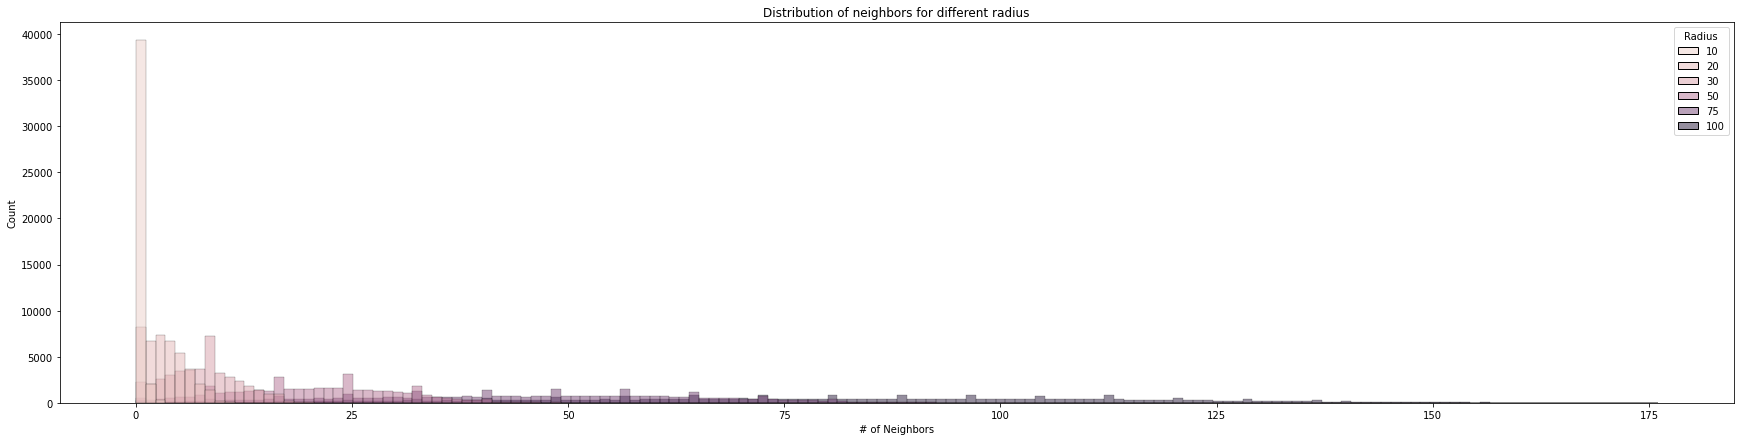

In [6]:
fig = plt.figure()
ax = sns.histplot(data=combined_replaced_cells, x="# of Neighbors", hue="Radius")
#plt.xticks(combined_replaced_cells["# of Neighbors"].unique())
fig.set_size_inches(30,7)
plt.title("Distribution of neighbors for different radius")
plt.show()

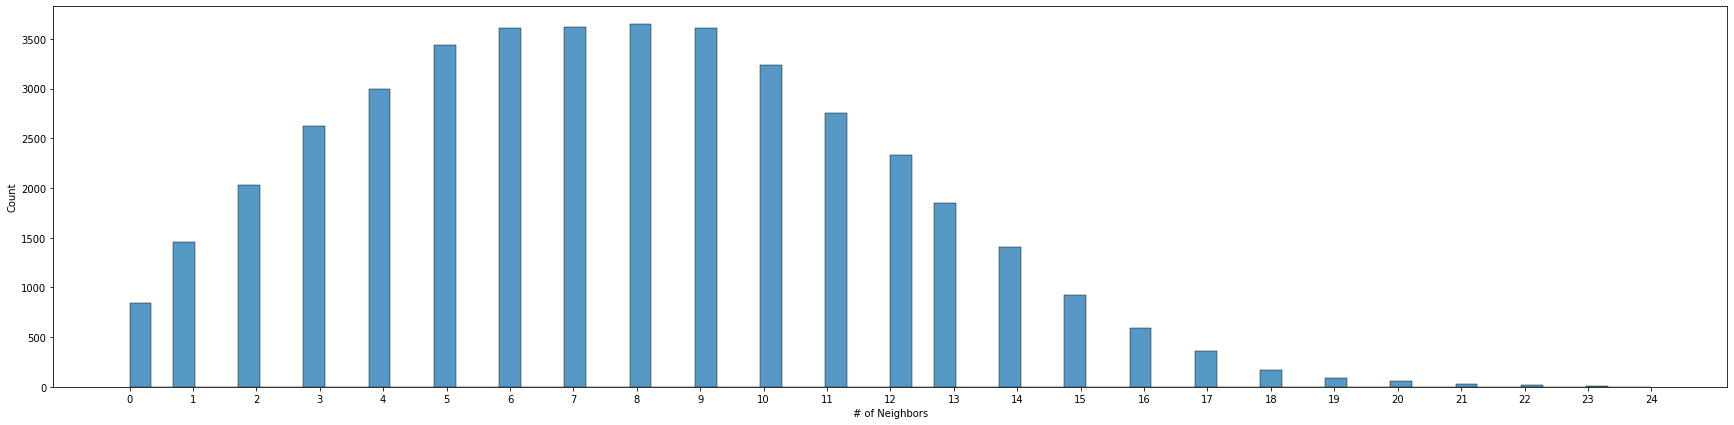

In [7]:
fig = plt.figure()
ax = sns.histplot(data=combined_replaced_cells[combined_replaced_cells["Radius"] == 30], x="# of Neighbors")
plt.xticks(combined_replaced_cells[combined_replaced_cells["Radius"] == 30]["# of Neighbors"].unique())
fig.set_size_inches(30,7)
plt.show()

## Count NAs per row

20% replaced data should yield a mean of 5 replaced features

In [8]:
combined_replaced_cells.isna().sum(axis=1).mean()

5.0

## Test Data

In [9]:
# Available Distances

combined_test_cells["Radius"].unique()

array([ 10,  20,  30,  50,  75, 100])

# Index Replacments

In [10]:
index_replacements = pd.read_csv(f"data/{case_to_evaluate}/index_replacements.csv")
#print(index_replacements)
index_replacements = index_replacements.T.to_dict()
#print(index_replacements)
print(len(index_replacements))


41669


# Load imputed features

In [11]:
features = pd.read_csv(f"data/{case_to_evaluate}/distance_based/features_to_impute.csv")
features = features["0"].to_list()
features

['pERK',
 'Rad51',
 'CCND1',
 'Vimentin',
 'aSMA',
 'Ecad',
 'ER',
 'PR',
 'EGFR',
 'pRB',
 'CD45',
 'Ki67',
 'CK19',
 'p21',
 'CK14',
 'AR',
 'cPARP',
 'CK17',
 'CK7',
 'HER2',
 'Area',
 'MajorAxisLength',
 'MinorAxisLength',
 'Solidity',
 'Extent',
 'Eccentricity']

# R2 score calculation

In [12]:
from typing import List, Dict
from sklearn.metrics import r2_score

def evaluate_performance(features: List, index_replacements: Dict, test_data: pd.DataFrame,
                             imputed_data: pd.DataFrame):
        """
        Evaluates the performance per feature
        @param features:
        @param index_replacements:
        @param test_data:
        @param imputed_data:
        @return: Returns a dataframe with r2 scores for performance evaluation
        """
        score_data: List = []

        for feature in features:
            if "X_centroid" in feature or "Y_centroid" in feature or "Origin" in feature:
                continue

            # Store all cell indexes, to be able to select the correct cells later for r2 comparison
            cell_indexes_to_compare: list = []
            for key, replaced_features in index_replacements.items():
                key = int(key)
                replaced_features = list(replaced_features.values())
                
                if feature in replaced_features:
                    cell_indexes_to_compare.append(key)
           
            score = r2_score(test_data[feature].loc[cell_indexes_to_compare],
                                  imputed_data[feature].loc[cell_indexes_to_compare])
                    
            score_data.append({
                "Feature": feature,
                "Score": score if score >= 0 else 0
            })

        return pd.DataFrame().from_records(score_data)

In [13]:
distance = 30

selected_test_cells = combined_test_cells[combined_test_cells["Radius"] == distance].reset_index(drop=True)
selected_imputed_cells = combined_imputed_cells[combined_imputed_cells["Radius"] == distance].reset_index(drop=True)

#selected_imputed_cells.filter(regex=("Mean *"))
selected_imputed_cells.filter(features)
#selected_test_cells.filter(features)

,pERK,Rad51,CCND1,Vimentin,aSMA,Ecad,ER,PR,EGFR,pRB,...,cPARP,CK17,CK7,HER2,Area,MajorAxisLength,MinorAxisLength,Solidity,Extent,Eccentricity
0,-3.427652,-4.859288,-2.266755,-0.931489,-1.632564,-2.083720,-2.932904,-1.445782,-2.523826,-1.913431,...,-1.036781,-0.623794,-0.585752,-0.713155,0.249242,-0.241034,0.512210,1.055029,1.214413,-0.404734
1,-3.430482,-4.821788,-2.444498,-0.980403,-0.753068,-1.921188,-2.890426,-1.839049,-2.336867,-2.047400,...,-0.981788,-0.557191,-0.541964,-0.548893,-0.832455,-1.439922,0.053630,0.728704,1.767834,-1.309589
2,-3.415997,-4.826050,-2.441037,-1.131971,-1.641660,-1.947636,-2.997578,-1.455293,-2.523826,-1.913431,...,-0.976296,-0.586584,-0.535361,-0.521268,0.630878,0.011409,0.784994,1.100753,0.872965,-0.429686
3,-4.530623,-4.799695,-3.085499,-0.585627,-1.640065,-1.955008,-2.934899,-1.463645,-2.196163,-2.040591,...,-0.979600,-0.553940,-0.550404,-0.543887,3.033929,2.586130,2.836798,0.553048,0.251008,0.020736
4,-3.417429,-4.816061,-1.474523,-0.533380,-1.645745,-2.131739,-2.961912,-1.459782,-2.200869,-2.121060,...,-0.985478,-0.556160,-0.548277,-0.541804,0.243023,0.560774,0.047333,0.910527,1.002206,-0.321308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41664,-3.331474,-2.512960,-2.146100,-0.605302,0.022110,-1.708471,-1.454559,-1.273307,-2.143495,-1.636879,...,-0.728458,-0.415478,-0.216914,-0.252247,1.550071,0.709317,1.991938,0.834881,0.469240,-1.801412
41665,-3.299970,-4.523503,-3.244893,-1.541298,1.263931,-1.785072,-1.442075,-1.282771,-2.832012,-1.600848,...,-0.738729,0.004717,-0.371440,-0.286583,0.523499,-0.243646,1.661043,0.755729,1.198003,-2.291271
41666,-2.713741,-4.216905,1.237563,0.825904,-0.633421,-1.844490,-2.452166,-1.456504,-2.306637,-2.068742,...,-0.967716,-0.820356,-0.565067,-0.571656,1.253377,0.964526,1.221977,0.951749,0.681627,0.069362
41667,-3.367841,-4.496620,-2.693144,-1.381064,-1.311084,-1.712252,-1.596532,-1.222928,-2.032962,-1.614081,...,-0.708329,-0.443775,-0.349824,-0.272717,1.707414,1.501820,1.489172,1.066874,1.096231,0.228523


In [14]:
combined_r2_scores_data = []
for radius in combined_test_cells["Radius"].unique():
    selected_test_cells = combined_test_cells[combined_test_cells["Radius"] == radius].reset_index(drop=True)
    selected_imputed_cells = combined_imputed_cells[combined_imputed_cells["Radius"] == radius].reset_index(drop=True)
    r2_scores = evaluate_performance(features, index_replacements, selected_test_cells, selected_imputed_cells)
    r2_scores["Radius"] = radius
    combined_r2_scores_data.append(r2_scores)
    
combined_r2_scores = pd.concat(combined_r2_scores_data)
combined_r2_scores.to_csv(f"data/{case_to_evaluate}/distance_based/combined_r2_scores.csv", index=False)
combined_r2_scores

,Feature,Score,Radius
0,pERK,0.274667,10
1,Rad51,0.302127,10
2,CCND1,0.182919,10
3,Vimentin,0.246285,10
4,aSMA,0.000000,10
...,...,...,...
21,MajorAxisLength,0.264727,100
22,MinorAxisLength,0.285436,100
23,Solidity,0.001407,100
24,Extent,0.000000,100


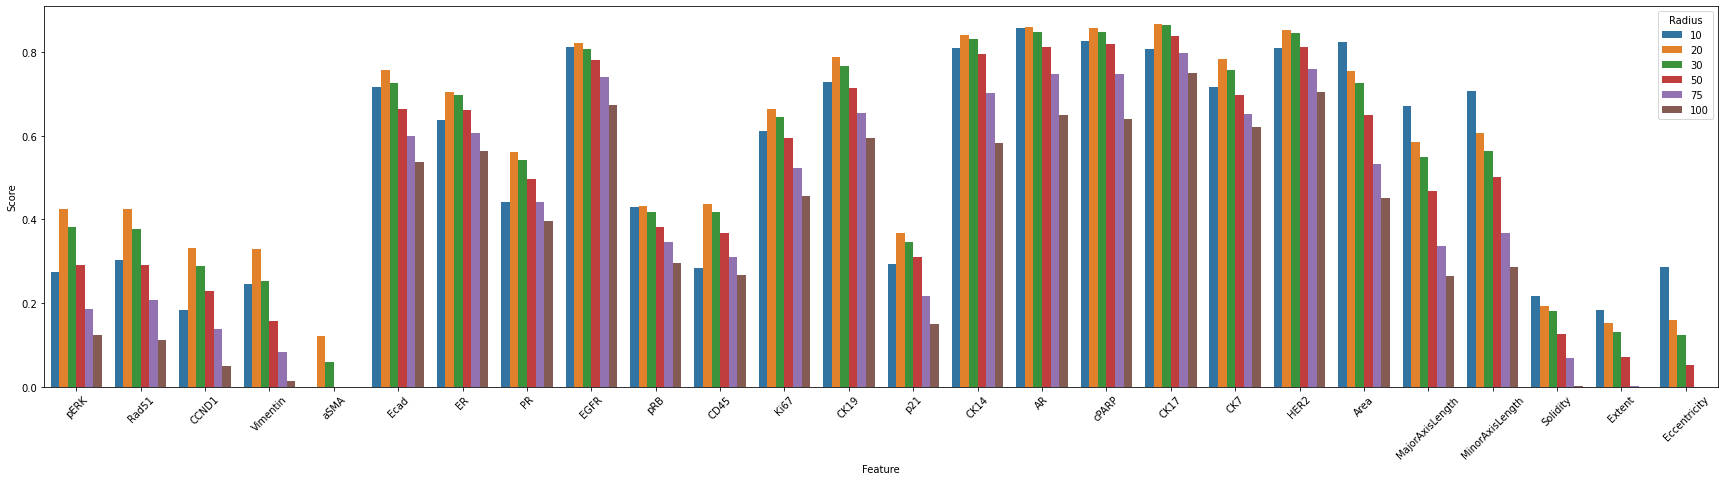

In [15]:
fig = plt.figure()
sns.barplot(x="Feature", y="Score",hue="Radius", data=combined_r2_scores)
for ax in fig.axes:
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
fig.set_size_inches(30,7)
plt.show()